### Denetimsiz Öğrenme

In [1]:
### Ham veri ile etiket olmadan desen (pattern) bulmaya çalışıyoruz.

## K-Means Algoritması

In [2]:
from sklearn.datasets import make_blobs

In [21]:
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

In [22]:
import matplotlib.pyplot as plt

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [27]:
kmeans.cluster_centers_

array([[ 4.7182049 ,  2.04179676],
       [-8.87357218,  7.17458342],
       [-6.83235205, -6.83045748],
       [-2.70981136,  8.97143336]])

In [34]:
y_true

array([3, 3, 0, 2, 3, 2, 1, 2, 0, 1, 0, 1, 0, 0, 3, 0, 3, 1, 0, 0, 1, 0,
       2, 3, 0, 3, 3, 2, 2, 1, 0, 1, 3, 1, 3, 0, 3, 2, 3, 2, 1, 0, 3, 2,
       0, 0, 3, 1, 3, 1, 2, 3, 2, 0, 2, 1, 3, 1, 1, 0, 3, 1, 1, 3, 2, 2,
       2, 2, 2, 0, 2, 2, 3, 1, 0, 3, 2, 2, 0, 2, 0, 0, 3, 0, 2, 3, 3, 1,
       1, 1, 3, 0, 3, 0, 0, 3, 2, 0, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 2, 3,
       1, 0, 0, 0, 0, 1, 3, 2, 3, 2, 2, 2, 0, 3, 2, 3, 3, 0, 3, 2, 1, 0,
       0, 0, 0, 1, 1, 3, 0, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 3, 1, 2,
       0, 1, 2, 3, 3, 1, 0, 3, 2, 3, 1, 3, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2,
       2, 1, 1, 2, 3, 0, 3, 1, 1, 3, 2, 0, 1, 1, 2, 2, 2, 3, 1, 2, 2, 1,
       1, 3, 0, 0, 2, 1, 0, 2, 2, 3, 2, 0, 0, 2, 2, 1, 3, 2, 3, 3, 0, 3,
       3, 2, 3, 2, 1, 1, 3, 3, 1, 1, 1, 3, 0, 2, 1, 2, 3, 1, 3, 3, 3, 2,
       2, 1, 3, 2, 2, 2, 3, 2, 3, 2, 3, 1, 2, 3, 1, 0, 3, 0, 1, 0, 3, 0,
       2, 1, 2, 1, 1, 0, 0, 2, 1, 1, 3, 3, 2, 0, 0, 1, 1, 1, 1, 2, 3, 1,
       2, 1, 1, 2, 0, 2, 1, 0, 3, 0, 1, 0, 3, 3])

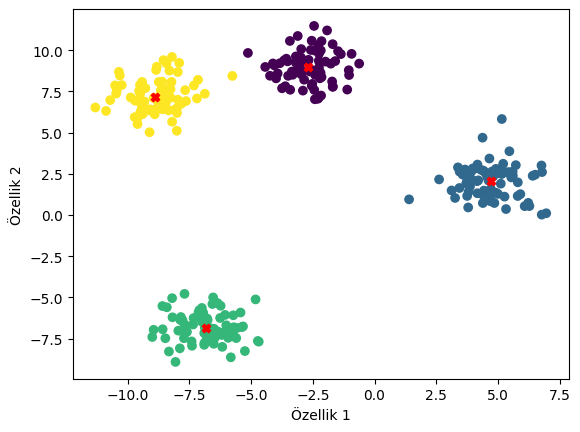

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y_true)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red",marker="X",label="Merkezler")
plt.xlabel("Özellik 1")
plt.ylabel("Özellik 2")
plt.show()

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv("Mall_Customers.csv")
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [40]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [41]:
df.shape

(200, 5)

In [42]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [44]:
# Öklid
kmeans2 = KMeans(n_clusters=3, random_state=42)
y = kmeans2.fit_predict(X)

In [47]:
centers2 = kmeans2.cluster_centers_
centers2

array([[87.        , 18.63157895],
       [86.53846154, 82.12820513],
       [44.15447154, 49.82926829]])

In [61]:
kume_isimleri = {}
for i,merkez in enumerate(centers2):
    gelir, harcama = merkez
    if gelir < 60 and harcama < 70:
        isim = "Düşük Gelir - Düşük Harcama"
    elif gelir < 80 and harcama >= 70:
        isim = "Düşük Gelir - Yüksek Harcama"
    else:
        isim = "Yüksek Gelir - Yüksek Harcama"
    kume_isimleri[i] = isim

kume_isimleri

{0: 'Yüksek Gelir - Yüksek Harcama',
 1: 'Yüksek Gelir - Yüksek Harcama',
 2: 'Düşük Gelir - Düşük Harcama'}

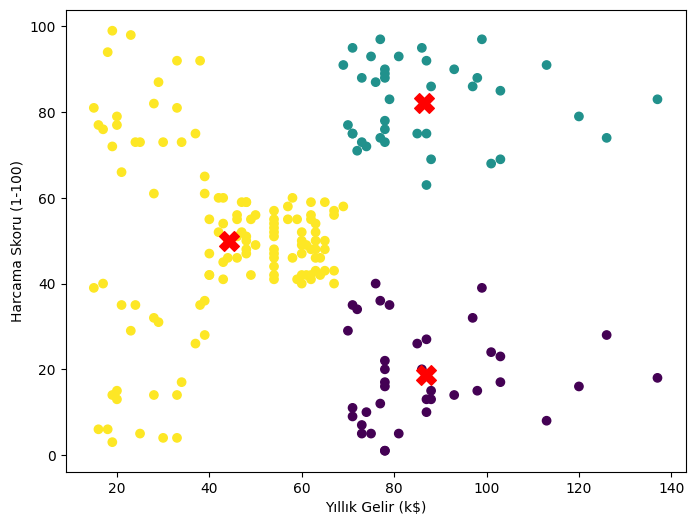

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(centers2[:,0], centers2[:,1], s=200, marker="X", c="red")
plt.xlabel("Yıllık Gelir (k$)")
plt.ylabel("Harcama Skoru (1-100)")
plt.show()

In [62]:
# En iyi değeri bulduktan sonra. Labellarla beraber grupları göster.

In [63]:
#Elbow yöntemi 

In [64]:
## Inertia 
## Her bir veri noktasının kendi küme merkezine olan kareli uzaklıklar toplamı

# (3,3) Merkez
# (2,2) -> Uzaklık karekök 2 -> kareli mesafe = 2
# (4,4) -> Uzaklık karekök 2 -> kareli mesafe = 2
# (6,6) -> Uzaklık karekök 18 -> kareli mesafe = 18

# 18 + 2 + 2 => 22

In [76]:
def elbow_method():
    inertias = []
    for k in range(1,10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    plt.figure(figsize=(8,6))
    plt.plot(range(1, 10), inertias)


#elbow_method()

In [72]:
kmeans3 = KMeans(n_clusters=5, random_state=42)
y3=kmeans3.fit_predict(X)
centers3 = kmeans3.cluster_centers_

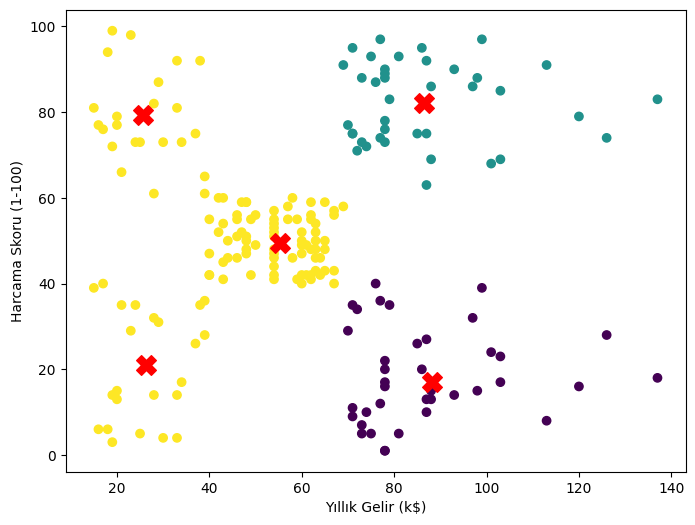

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(centers3[:,0], centers3[:,1], s=200, marker="X", c="red")
plt.xlabel("Yıllık Gelir (k$)")
plt.ylabel("Harcama Skoru (1-100)")
plt.show()

In [78]:
# Silhouette Method
# Bir nokta kendi kümesine ne kadar yakın? +
# Bir nokta diğer kümeler ne kadar uzak? +
# -1 ile 1 arasında

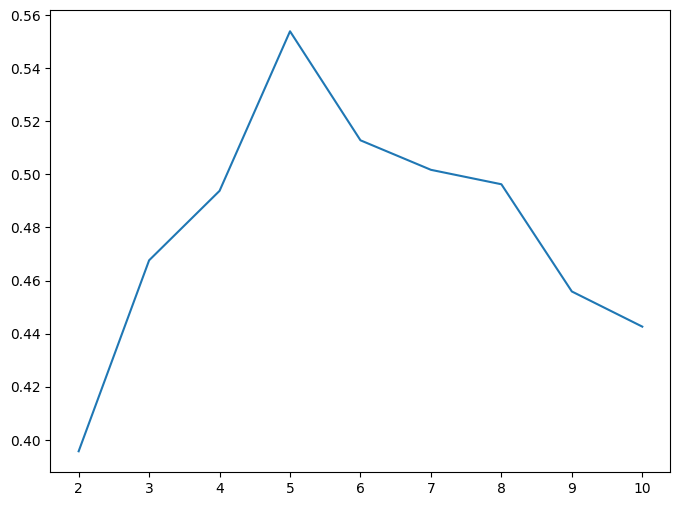

In [82]:
from sklearn.metrics import silhouette_score

def my_silhouette_method():
    scores=[]
    for k in range(2,11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        y = kmeans.fit_predict(X)
        scores.append(silhouette_score(X,y))
    plt.figure(figsize=(8,6))
    plt.plot(range(2,11),scores)
    plt.show()

my_silhouette_method()